## Ajuste de los parámetros del modelo a datos reales de defunciones

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle 

In [2]:
import datosporregion as dpr
from model import SEIRDmodel

Cargamos los datos que queremos usar (totales, por entidad, cdmx):

In [3]:
viajes = dpr.viajes_regiones()
casos = dpr.casos_regiones()

In [4]:
modelo = SEIRDmodel(viajes, casos)

La siguiente línea de código es la que debería correrse para realizar el ajuste.

In [5]:
#ajuste = modelo.ajustar()

In [6]:
ajuste

array([5.43375390e-05, 1.17328956e-01, 3.81690558e-01, 2.46371624e-01,
       2.90963117e-01, 2.26120157e-01, 1.35486514e-01, 5.89313220e-01,
       2.40834896e-01])

In [8]:
with open('D:/Edgar Trejo/Universidad/BioMatematica/Modeling COVID-19 Spreading in the ZMVM/results/ajuste8regiones.pkl', 'wb') as handle:
    pickle.dump(ajuste, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [9]:
ynor = modelo.simular()

In [13]:
modelo.poblaciones

array([1983890, 3209181, 4080608, 3252076, 2468139,  830660, 2642603,
       2406496], dtype=int64)

In [19]:
infectados = ynor[[5*i + 2 for i in range(8)]]
infectados

array([[0.00000000e+00, 3.44839370e-04, 1.48523219e-03, 3.61407096e-03,
        6.98008606e-03, 1.19148651e-02, 1.88665033e-02, 2.84329296e-02,
        4.14295729e-02, 5.90347359e-02, 8.28354840e-02, 1.15004196e-01,
        1.58575244e-01, 2.18164974e-01, 3.00061942e-01, 4.12971685e-01,
        5.68651993e-01, 7.85322444e-01, 1.08995956e+00, 1.51842348e+00,
        2.12203217e+00, 2.97006545e+00, 4.17367473e+00, 5.89377482e+00,
        8.34391332e+00, 1.18314437e+01, 1.67841327e+01, 2.38832752e+01,
        3.40896518e+01, 4.86961495e+01, 6.95491790e+01, 9.93642704e+01,
        1.42293472e+02, 2.03966806e+02, 2.92328332e+02, 4.18531997e+02,
        5.99763235e+02, 8.60311817e+02, 1.23311531e+03, 1.76483284e+03,
        2.52350355e+03, 3.60624332e+03, 5.14157331e+03, 7.30628994e+03,
        1.03342819e+04, 1.45310764e+04, 2.02739187e+04, 2.79999264e+04,
        3.81800734e+04, 5.12320191e+04, 6.75078928e+04, 8.72230130e+04,
        1.10307342e+05, 1.36500284e+05, 1.65363426e+05, 1.962805

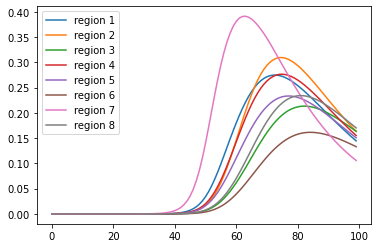

In [18]:
fig, ax = plt.subplots()

for i, _ in enumerate(infectados):
    ax.plot(_/modelo.poblaciones[i], label = 'region {}'.format(i+1))

plt.legend()
plt.show()